# Importar bibliotecas

In [158]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


# Importar e visualizar base 

In [159]:
#importar base
base = pd.read_csv('Customers.csv')

In [160]:
#visualizar
base.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [161]:
#visualizar informações
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [162]:
#informações estatísticas
base.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


# Tratar dados

Primeiramente, é possível verificar que existem clientes com valor nulo na profissão. Vamos colocar o texto "Não cadastrado" para essas pessoas.

In [163]:
#verificar os clientes com valor nulo para a profissão
base[base.Profession.isnull()]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


In [164]:
#inserir o texto "Não_cadastrado" no lugar dos valores nulos
base.loc[base.Profession.isnull(), 'Profession'] = 'Nao_cadastrado'

In [165]:
#verificar se ainda existem valores nulos para a profissão
base.Profession.isnull().sum()

0

In [166]:
#confirmar que os valores foram substituídos corretamente
base.Profession.value_counts()

Artist            612
Healthcare        339
Entertainment     234
Engineer          179
Doctor            161
Executive         153
Lawyer            142
Marketing          85
Homemaker          60
Nao_cadastrado     35
Name: Profession, dtype: int64

Também é possível notar que existem pessoas com idade igual a zero, igual a um, igual a dois.... Ou seja, existem muitos clientes com a idade preenchida de forma errada no nosso banco de dados. Como não será possível saber a idade exata de cada pessoa, vou optar por transformar em nula as idades de pessoas que estão cadastradas com menos de 18 anos.
Após essa transformação, irei substituir esses valores nulos de acordo com a mediana das idades que sobraram.

In [167]:
#visualizar a quantidade de clientes que estão cadastrados com menos de 18 anos

base[base.Age<18].shape[0]

332

In [168]:
#colocar o valor nulo para essas idades
base.loc[base.Age<18, 'Age'] = np.nan

In [169]:
#visualizar mediana de idade por gênero e profissão
mediana_idades = base.groupby(['Gender','Profession'])['Age'].median().reset_index()

In [170]:
mediana_idades

,Gender,Profession,Age
0,Female,Artist,55.0
1,Female,Doctor,59.0
2,Female,Engineer,64.0
3,Female,Entertainment,55.0
4,Female,Executive,57.0
5,Female,Healthcare,53.0
6,Female,Homemaker,44.5
7,Female,Lawyer,53.0
8,Female,Marketing,61.0
9,Female,Nao_cadastrado,52.0


In [171]:
#substituindo as idades zeradas pela mediana de acordo com profissão e gênero
for i, valor in enumerate (mediana_idades.Gender):
    genero = mediana_idades.Gender[i]
    profissao = mediana_idades.Profession[i]
    idade = mediana_idades.Age[i]
    base.loc[(base.Gender==genero) & (base.Profession==profissao) & (base.Age.isnull()), 'Age'] = idade
  

# Análises exploratórias e algumas visualizações

### Percentual de homens e mulheres como clientes

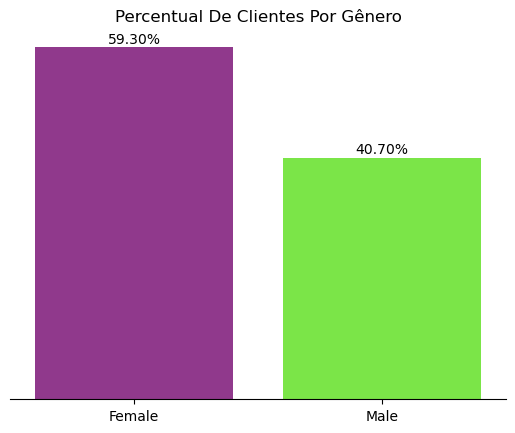

In [172]:
fig, ax = plt.subplots()
sns.barplot(x = base.Gender.value_counts().index, y = base.Gender.value_counts(), palette = ['#9E2A9A', '#72FF2E'])
for i in range (len(base.Gender.value_counts().index)):
    percentual = f'{base.Gender.value_counts()[i]/base.Gender.value_counts().sum():.2%}'
    ax.annotate(percentual, (i,base.Gender.value_counts()[i]), ha = 'center', xytext = (0,3), textcoords = 'offset points')

ax.set_title('Percentual De Clientes Por Gênero')
ax.get_yaxis().set_visible(False)
ax.spines[['left', 'top', 'right']].set_visible(False)

### Homens e mulheres em cada profissão

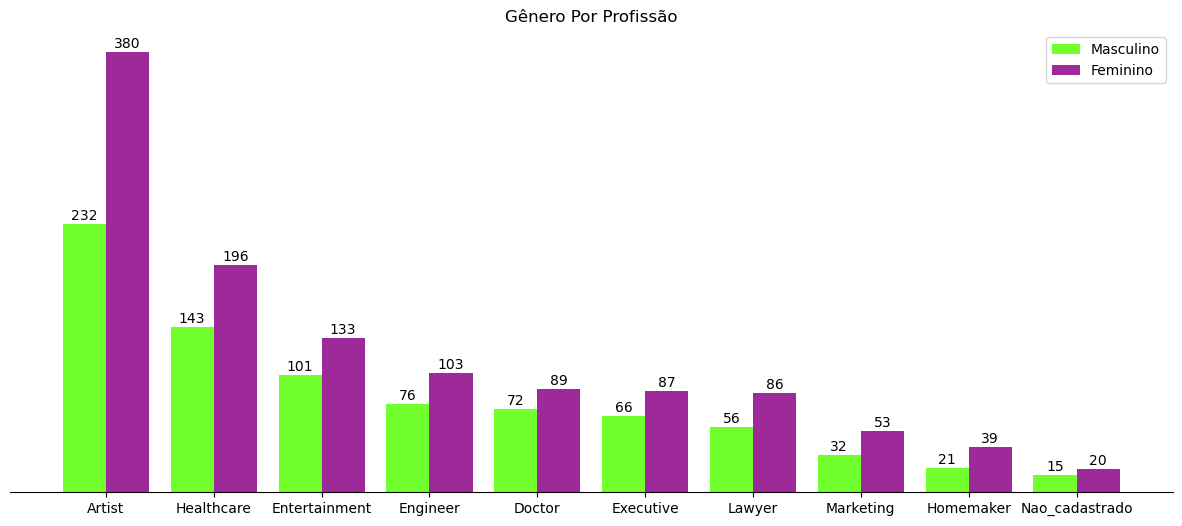

In [173]:
fig, ax = plt.subplots(figsize = (15,6))

w = 0.4

ax.bar(x = np.arange(0,len(base.Profession.value_counts().index))-w/2, 
       height = base.loc[base.Gender=='Male','Profession'].value_counts(), width = w, color ='#72FF2E', label = 'Masculino')

ax.bar(x = np.arange(0,len(base.Profession.value_counts().index))+w/2, 
       height = base.loc[base.Gender=='Female','Profession'].value_counts(), width = w, color = '#9E2A9A', label = 'Feminino')

ax.set_xticks(np.arange(0,len(base.Profession.value_counts().index)))
ax.set_xticklabels(base.Profession.value_counts().index)

for i in range(0,len(base.Profession.value_counts().index)):
    ax.annotate(base.loc[base.Gender=='Male','Profession'].value_counts()[i],
                (i-w/2,base.loc[base.Gender=='Male','Profession'].value_counts()[i]), 
                ha = 'center', xytext = (0,3), textcoords = 'offset points')
    ax.annotate(base.loc[base.Gender=='Female','Profession'].value_counts()[i],
                (i+w/2,base.loc[base.Gender=='Female','Profession'].value_counts()[i]), 
                ha = 'center', xytext = (0,3), textcoords = 'offset points')
    
ax.set_title('Gênero Por Profissão')
ax.get_yaxis().set_visible(False)
ax.spines[['left', 'top', 'right']].set_visible(False)
    
plt.legend()
plt.show()


### Média de pontuação em cada profissão

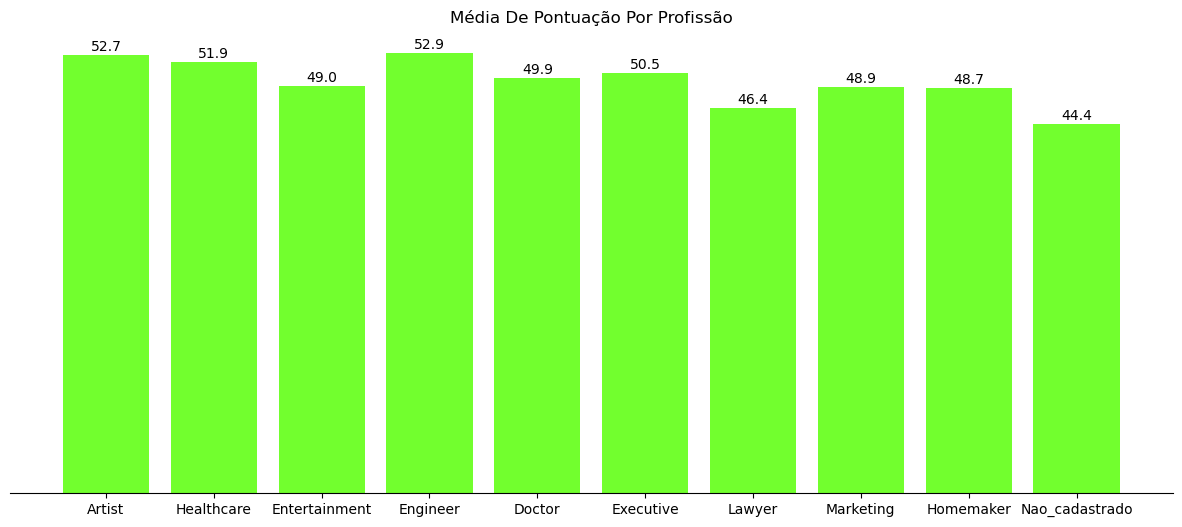

In [174]:
fig, ax = plt.subplots(figsize = (15,6))

ax.bar(x = base.Profession.value_counts().index, 
       height = base.groupby('Profession')['Spending Score (1-100)'].mean(), color ='#72FF2E')

for i in range(0,len(base.Profession.value_counts().index)):
    ax.annotate(f"{base.groupby('Profession')['Spending Score (1-100)'].mean()[i]:.1f}",
                (i,base.groupby('Profession')['Spending Score (1-100)'].mean()[i]), 
                ha = 'center', xytext = (0,3), textcoords = 'offset points')

ax.set_title('Média De Pontuação Por Profissão')
ax.get_yaxis().set_visible(False)
ax.spines[['left', 'top', 'right']].set_visible(False)

### Renda anual média por profissão

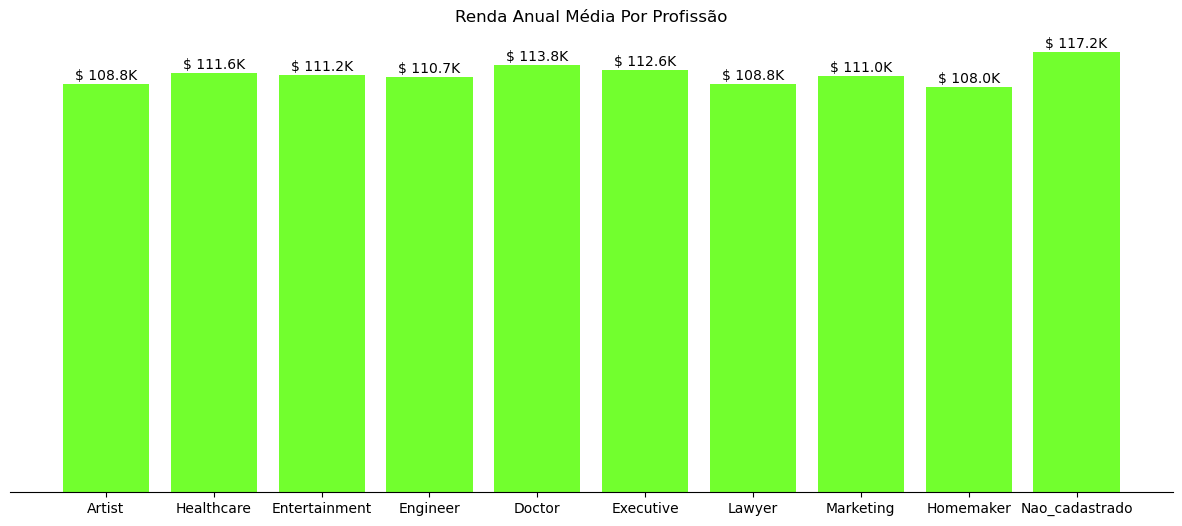

In [175]:
fig, ax = plt.subplots(figsize = (15,6))

ax.bar(x = base.Profession.value_counts().index, 
       height = base.groupby('Profession')['Annual Income ($)'].mean(), color ='#72FF2E')

for i in range(0,len(base.Profession.value_counts().index)):
    ax.annotate(f"$ {(base.groupby('Profession')['Annual Income ($)'].mean()[i])/1000:.1f}K",
                (i,base.groupby('Profession')['Annual Income ($)'].mean()[i]), 
                ha = 'center', xytext = (0,3), textcoords = 'offset points')

ax.set_title('Renda Anual Média Por Profissão')
ax.get_yaxis().set_visible(False)
ax.spines[['left', 'top', 'right']].set_visible(False)

### Concentração de clientes por renda anual

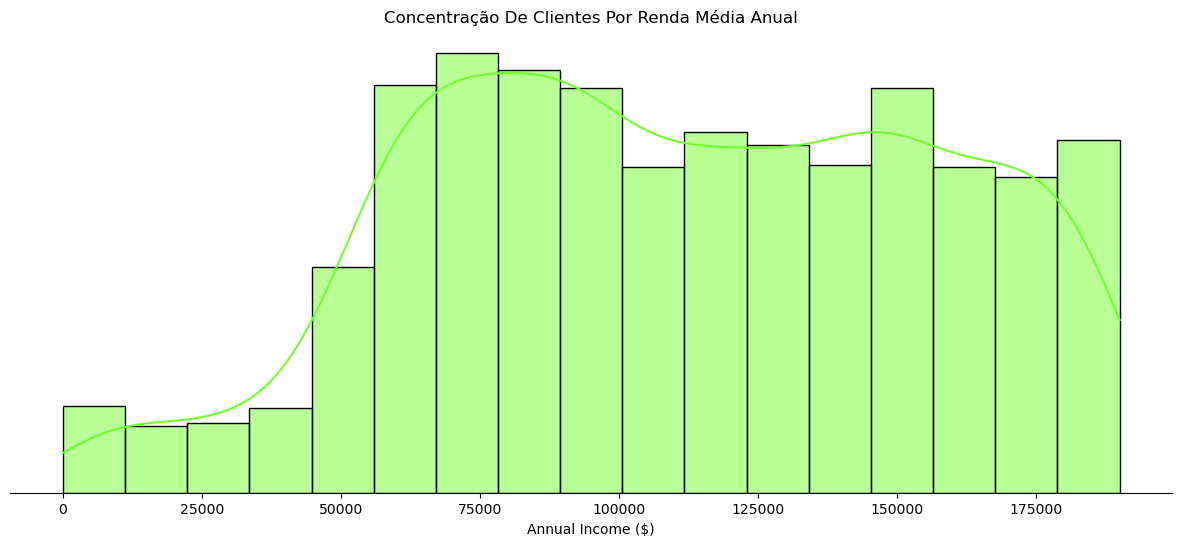

In [176]:
fig, ax = plt.subplots(figsize = (15,6))

sns.histplot(data = base, x = 'Annual Income ($)', color ='#72FF2E', kde = True)

ax.set_title('Concentração De Clientes Por Renda Média Anual')
ax.get_yaxis().set_visible(False)
ax.spines[['left', 'top', 'right']].set_visible(False)

# Feature engineering

A base possui 2 colunas com valores textuais. Vamos precisar transformar esses valores para termos apenas números na tabela

In [177]:
#primeiro, vamos criar uma cópia da base

base2 = base.copy()

#apagando a coluna de CustomerID, pois não desejo que o modelo seja influenciado pelo ID na hora de separar os grupos

base2 = base2.drop('CustomerID', axis = 1)

### Gender

In [178]:
#substituindo Male por 0 e Female por 1

base2.loc[base.Gender=='Male','Gender'] = 0
base2.loc[base.Gender=='Female','Gender'] = 1

### Profession

Primeiramente, vamos verificar quantas profissões existem e como está a distribuição de clientes nessas profissões

In [179]:
#contando a quantidade de clientes por profissão
base2.Profession.value_counts()

Artist            612
Healthcare        339
Entertainment     234
Engineer          179
Doctor            161
Executive         153
Lawyer            142
Marketing          85
Homemaker          60
Nao_cadastrado     35
Name: Profession, dtype: int64

É possível perceber que existe um número muito grande de artistas. Em contrapartida, existem 3 profissões com um número muito baixo de pessoas (Marketing, Homemaker, Nao_cadastrado). Vamos pegar essas 3 profissões com número menor de pessoas e juntá-las para diminuir o número de colunas criadas quando formos transformar em valores numéricos utilizando o get_dummies.

In [180]:
#juntando as profissões com menos de 100 pessoas na categoria "Outra"
profissoes_menores = []
for profissao, quantidade in enumerate (base2.Profession.value_counts()):
    if quantidade < 100:
        profissoes_menores.append(base2.Profession.value_counts().index[profissao])
base2.loc[base2.Profession.isin(profissoes_menores), 'Profession'] = 'Outra'        

In [181]:
#verificando novamente a distribuição das profissões
base2.Profession.value_counts()

Artist           612
Healthcare       339
Entertainment    234
Outra            180
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Name: Profession, dtype: int64

In [182]:
#utilizando o get_dummies para transformar as profissões em valores numericos
base2 = pd.get_dummies(base2, columns=['Profession'])

In [183]:
#verificando a base
base2.head(2)

,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Lawyer,Profession_Outra
0,0,19.0,15000,39,1,4,0,0,0,0,0,1,0,0
1,0,21.0,35000,81,3,3,0,0,1,0,0,0,0,0


# Padronização dos dados

In [184]:
#treinar o padronizador
padronizador = StandardScaler().fit(base2[['Age','Annual Income ($)', 'Spending Score (1-100)', 'Work Experience','Family Size']])

In [185]:
#alterando os valores na base
base2[['Age','Annual Income ($)', 'Spending Score (1-100)', 'Work Experience','Family Size']] = padronizador.transform(base2[['Age','Annual Income ($)', 'Spending Score (1-100)', 'Work Experience','Family Size']])

In [186]:
#informações estatísticas da base padronizada
base2.describe()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Lawyer,Profession_Outra
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1.686429e-16,-4.943294e-16,2.584044e-17,1.020017e-17,4.932721e-16,0.306000,0.080500,0.089500,0.117000,0.076500,0.169500,0.071000,0.090000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,0.460945,0.272134,0.285535,0.321501,0.265863,0.375287,0.256889,0.286253
min,-1.779479e+00,-2.421527e+00,-1.824803e+00,-1.046230e+00,-1.405148e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.202280e-01,-7.907571e-01,-8.222131e-01,-7.912071e-01,-8.975992e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.987020e-03,-1.501968e-02,-3.446402e-02,-2.811622e-01,1.174974e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.328448e-01,8.388918e-01,8.607053e-01,7.389275e-01,6.250458e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.920489e+00,1.732899e+00,1.755875e+00,3.289152e+00,2.655239e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [187]:
#visualizando a base
base2.head(2)

,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Lawyer,Profession_Outra
0,0,-1.733800,-2.093501,-0.428339,-0.791207,0.117497,0,0,0,0,0,1,0,0
1,0,-1.642443,-1.656133,1.075546,-0.281162,-0.390051,0,0,1,0,0,0,0,0


# Separar os clientes em grupos - Aprendizado Não Supervisionado

Vamos utilizar o KMeans para dividir nossos clientes em grupos. Inicialmente, penso em divir os clientes em algo entre 2 e 5 grupos. Vou utilizar o método do cotovelo para verificar se algum número entre 2 e 5 pode realmente se enquadrar como um bom valor para a quantidade de grupos

In [188]:
#testando valores de clusters entre 2 e 5
k = []
inercia = []

for i in range (2,6):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(base2)
    k.append(i)
    inercia.append(kmeans.inertia_)


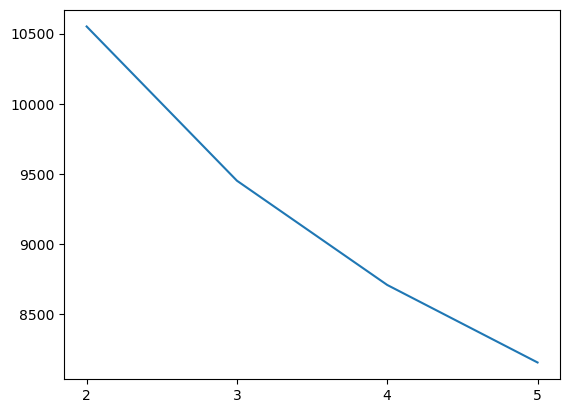

In [189]:
#gerando o gráfico de número de clusters X inércia para utilizar o método do cotovelo
fig, ax = plt.subplots()
ax.plot(k, inercia)
ax.set(xticks = np.arange(2,6))
plt.show()

É possível verificar um pequeno cotovelo no número 3 e outro no número 4. Vou optar por dividir os clientes em 3 grupos

In [190]:
#realizando o fit do kmeans para 3 grupos
kmeans = KMeans(n_clusters=3, random_state=0).fit(base2)

In [191]:
#verificando a quantidade de clientes em cada grupo
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([670, 656, 674], dtype=int64))

Foi notado que o modelo separou os clientes em 3 grupos com quantidades bem próximas de clientes

In [192]:
#adicionando esses grupos na base original (sem realizar feature engineering)
base['Grupo'] = kmeans.labels_

In [193]:
#visualizando a base original com a coluna dos grupos
base.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Grupo
0,1,Male,19.0,15000,39,Healthcare,1,4,1
1,2,Male,21.0,35000,81,Engineer,3,3,1
2,3,Female,20.0,86000,6,Engineer,1,1,1
3,4,Female,23.0,59000,77,Lawyer,0,2,1
4,5,Female,31.0,38000,40,Entertainment,2,6,1


# Verificar modelo de classificação

Com os clientes separados em grupos, gostaria de verificar se os modelos de classificação conseguem encontrar um bom padrão na divisão desses grupos para realizar a predição. Dessa forma, vou testar o modelo de Regressão Logística.

In [194]:
#adicionando os grupos na base que foi realizada feature engineering 
base2['Grupo'] = kmeans.labels_

In [195]:
#separando em X e y
X = base2.drop('Grupo', axis = 1)
y = base2['Grupo']

In [196]:
#separando em base de treino e base de teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [197]:
#criando o modelo, fazendo o treinamento e predição
logistico = LogisticRegression(random_state=0)
logistico.fit(X_train, y_train)
pred = logistico.predict(X_test)

In [198]:
#olhando a matriz de confusão
confusion_matrix(y_test, pred)

array([[118,   2,   0],
       [  1, 133,   2],
       [  0,   1, 143]], dtype=int64)

In [199]:
#olhando a acurácia do modelo
accuracy_score(y_test, pred)

0.985

O modelo conseguiu prever os grupos com 98,5% de acurácia. Além disso, através da matriz de confusão, percebe-se que foi muito bem para todos os grupos. Sendo assim, o modelo conseguiu ser muito acertivo.

Por fim, vamos salvar a base em formato excel para criarmos um dashboard utilizando o Power BI.

In [200]:
base.to_excel('Base_Consumidores.xlsx')